## Exploratory Data Analysis (EDA)

In [23]:
import pandas as pd

df = pd.read_csv('/content/wine.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [24]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [25]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058

In [26]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


Generating histograms and box plots for numerical features...


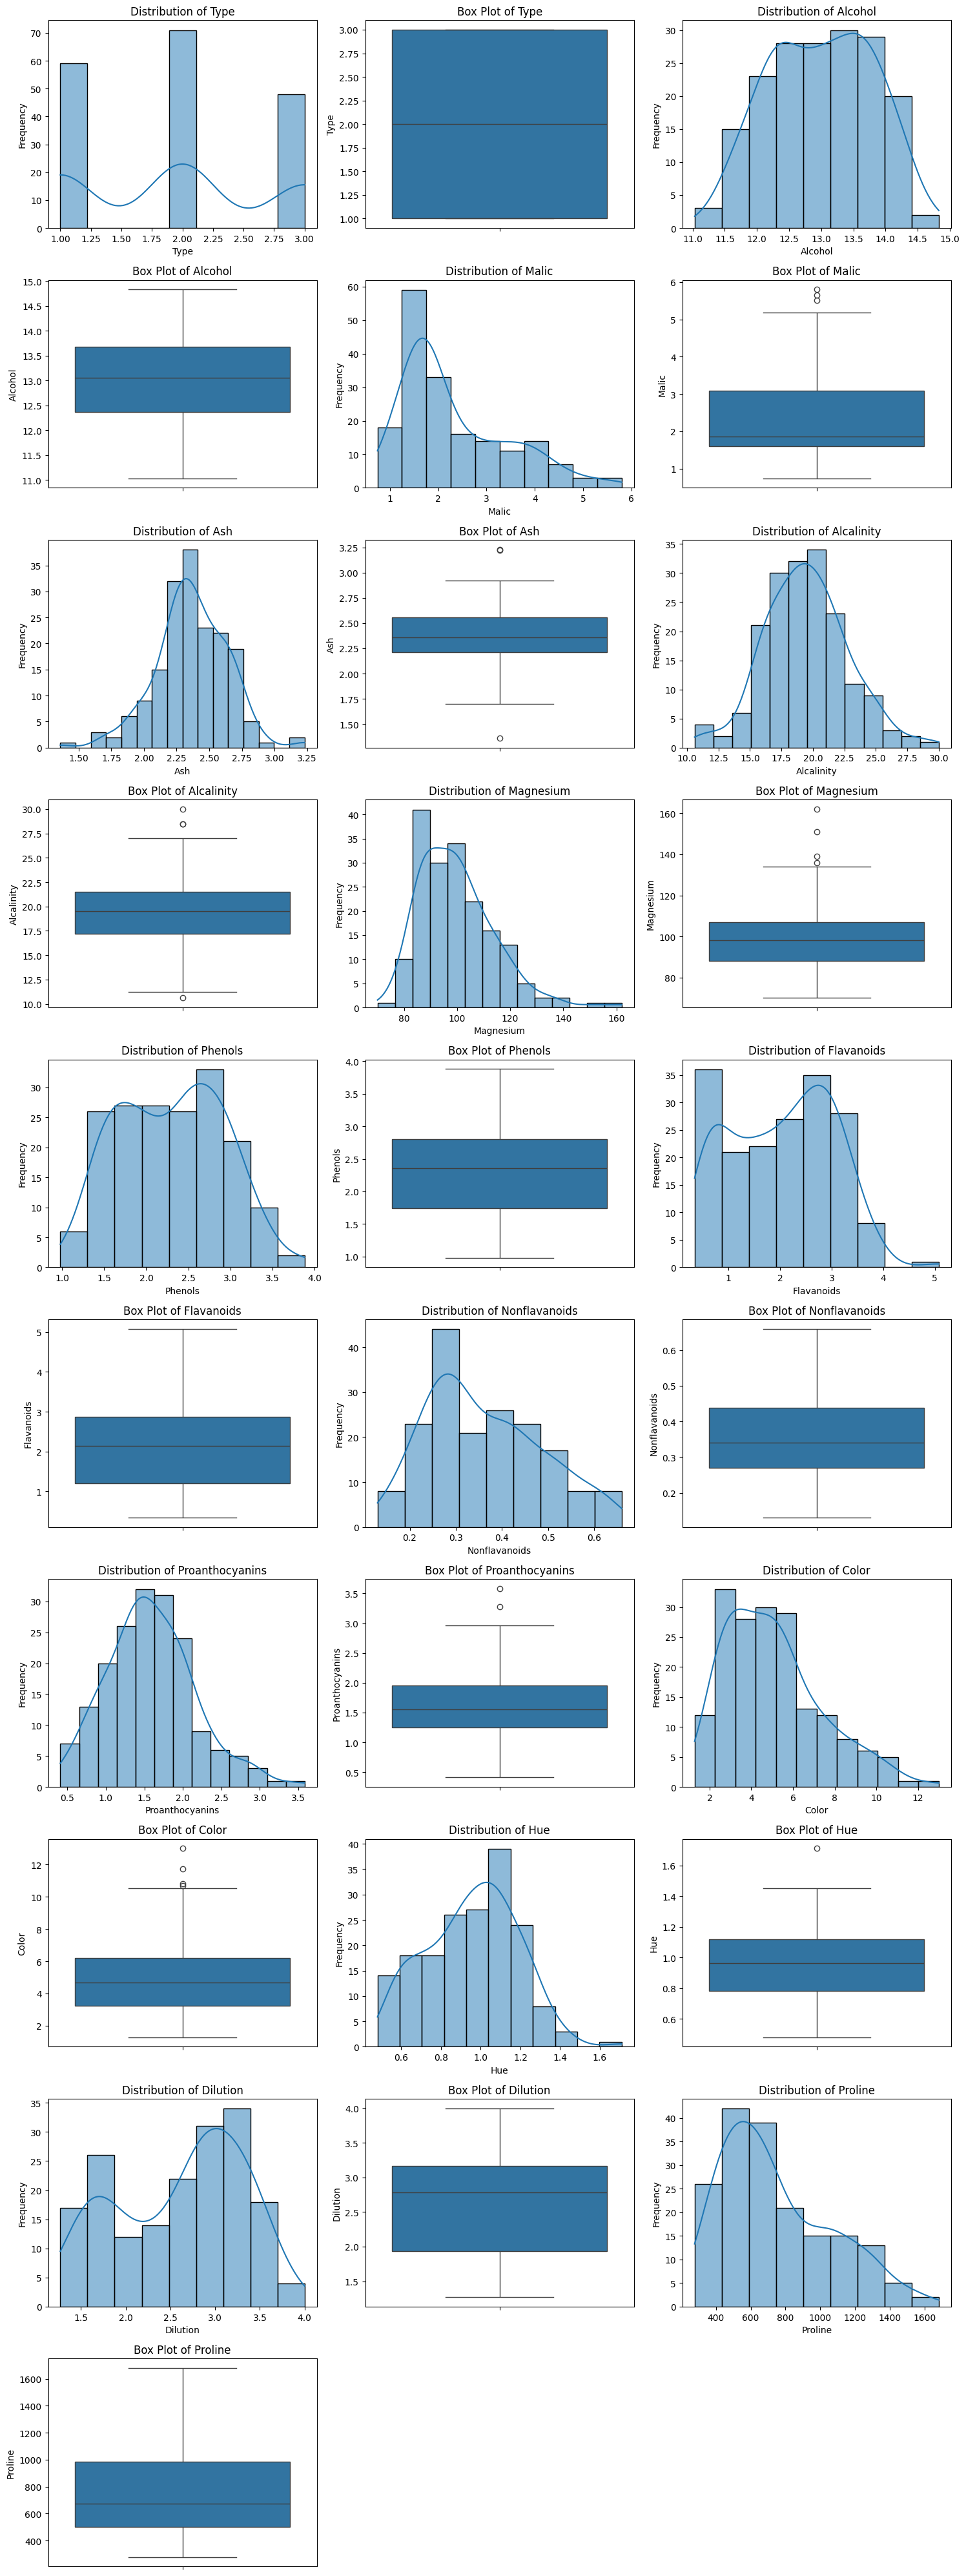

Histograms and box plots generated successfully.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating histograms and box plots for numerical features...")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


num_features = len(numerical_cols)
num_cols_per_row = 3
num_rows = (num_features * 2 + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))

for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(num_rows, num_cols_per_row, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(num_rows, num_cols_per_row, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print("Histograms and box plots generated successfully.")

Calculating correlation matrix and generating heatmap...


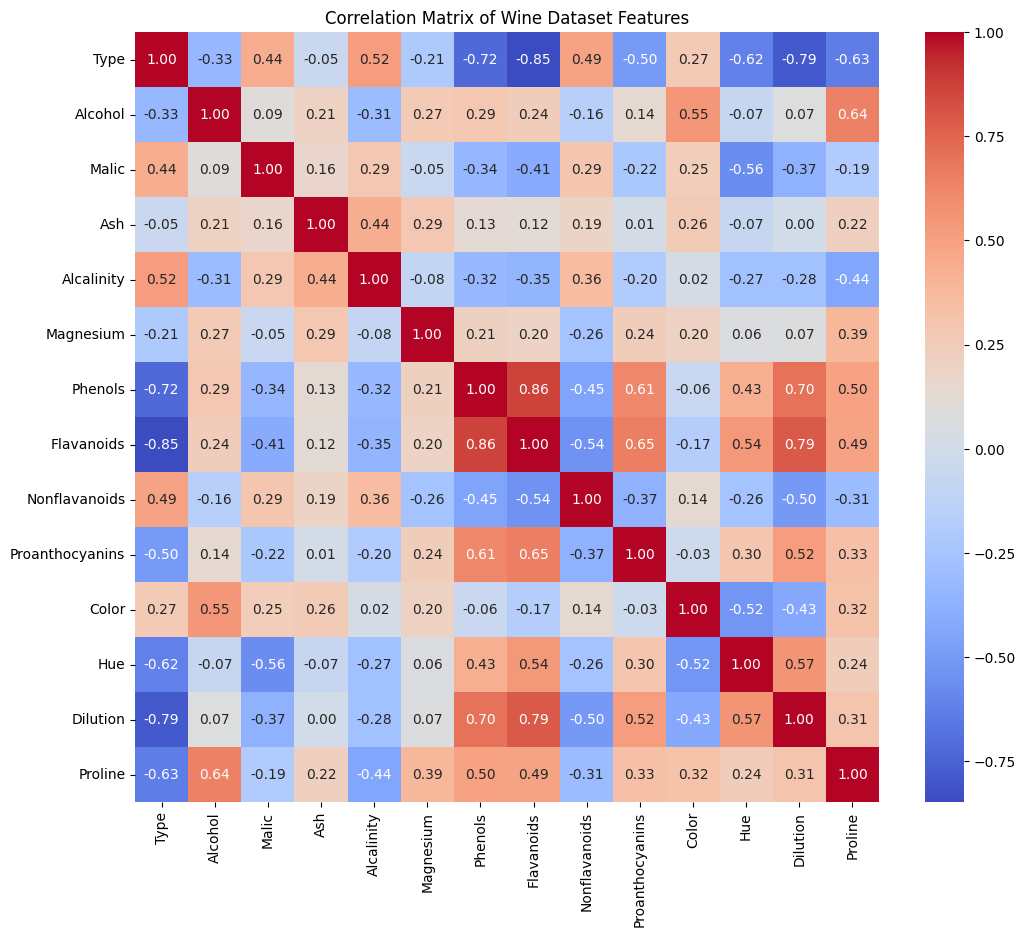

Correlation matrix and heatmap generated successfully.


In [28]:
print("Calculating correlation matrix and generating heatmap...")

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

print("Correlation matrix and heatmap generated successfully.")

## Dimensionality Reduction with PCA



In [29]:
print("Separating features from the target variable...")

X = df.drop('Type', axis=1)
y = df['Type']

print("Features (X) and target (y) separated successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:\n", X.head())

Separating features from the target variable...
Features (X) and target (y) separated successfully.
Shape of X: (178, 13)
Shape of y: (178,)
First 5 rows of X:
    Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [30]:
print("Standardizing features...")

from sklearn.preprocessing import StandardScaler

#StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features standardized successfully. Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled (after standardization):\n", X_scaled[:5])

Standardizing features...
Features standardized successfully. Shape of X_scaled: (178, 13)
First 5 rows of X_scaled (after standardization):
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


Applying PCA and plotting cumulative explained variance...


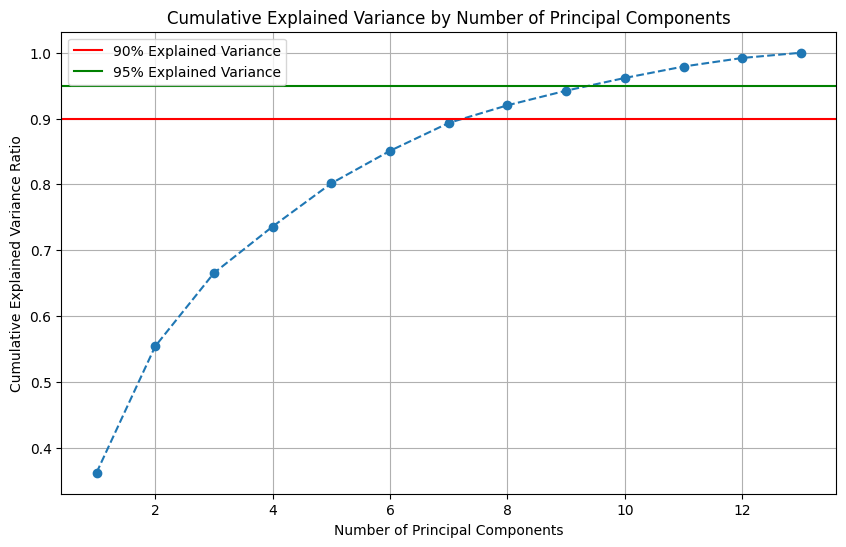

Cumulative explained variance plot generated successfully.


In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Applying PCA and plotting cumulative explained variance...")
pca = PCA()
pca.fit(X_scaled)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)


plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

print("Cumulative explained variance plot generated successfully.")

In [32]:
print("Re-instantiating PCA with optimal number of components and transforming data...")


optimal_components = 8


pca_final = PCA(n_components=optimal_components)


X_pca = pca_final.fit_transform(X_scaled)

print(f"Data transformed into {optimal_components} principal components. Shape of X_pca: {X_pca.shape}")
print("First 5 rows of X_pca (principal components):", X_pca[:5])

Re-instantiating PCA with optimal number of components and transforming data...
Data transformed into 8 principal components. Shape of X_pca: (178, 8)
First 5 rows of X_pca (principal components): [[ 3.31675081  1.44346263 -0.16573904 -0.21563119  0.69304284  0.22388013
   0.59642655 -0.06513909]
 [ 2.20946492 -0.33339289 -2.02645737 -0.29135832 -0.25765463  0.92712024
   0.05377561 -1.02441595]
 [ 2.51674015  1.0311513   0.98281867  0.72490231 -0.25103312 -0.54927605
   0.42420545  0.34421613]
 [ 3.75706561  2.75637191 -0.17619184  0.56798331 -0.31184159 -0.114431
  -0.3833373  -0.6435935 ]
 [ 1.00890849  0.86983082  2.02668822 -0.40976579  0.2984575   0.4065196
   0.44407446 -0.41670047]]


In [33]:
print("Re-instantiating PCA with optimal number of components and transforming data...")


optimal_components = 8


pca_final = PCA(n_components=optimal_components)


X_pca = pca_final.fit_transform(X_scaled)

print(f"Data transformed into {optimal_components} principal components. Shape of X_pca: {X_pca.shape}")
print("First 5 rows of X_pca (principal components):\n", X_pca[:5])

Re-instantiating PCA with optimal number of components and transforming data...
Data transformed into 8 principal components. Shape of X_pca: (178, 8)
First 5 rows of X_pca (principal components):
 [[ 3.31675081  1.44346263 -0.16573904 -0.21563119  0.69304284  0.22388013
   0.59642655 -0.06513909]
 [ 2.20946492 -0.33339289 -2.02645737 -0.29135832 -0.25765463  0.92712024
   0.05377561 -1.02441595]
 [ 2.51674015  1.0311513   0.98281867  0.72490231 -0.25103312 -0.54927605
   0.42420545  0.34421613]
 [ 3.75706561  2.75637191 -0.17619184  0.56798331 -0.31184159 -0.114431
  -0.3833373  -0.6435935 ]
 [ 1.00890849  0.86983082  2.02668822 -0.40976579  0.2984575   0.4065196
   0.44407446 -0.41670047]]


## Clustering with Original Data


Determining optimal number of clusters (K) for original scaled data using Elbow Method...


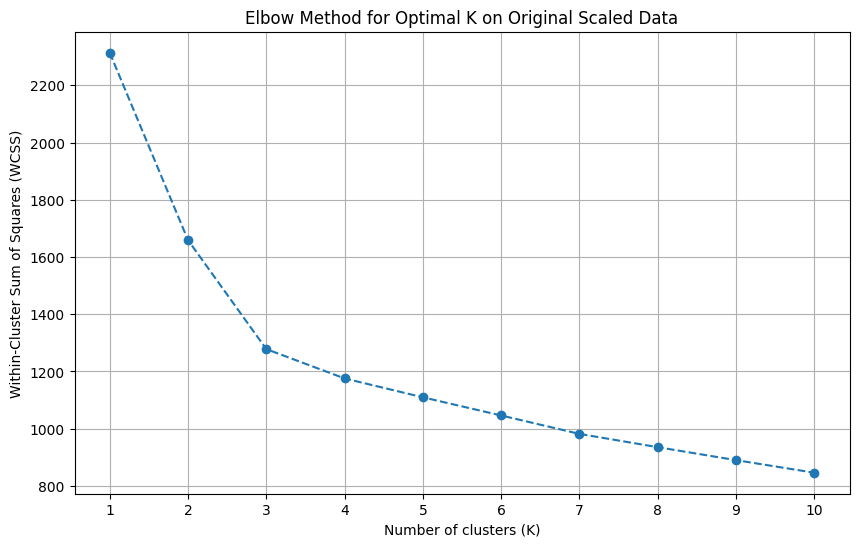

Elbow Method plot generated successfully.


In [34]:
print("Determining optimal number of clusters (K) for original scaled data using Elbow Method...")

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []

for k in range(1, 11):

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K on Original Scaled Data')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow Method plot generated successfully.")

**Reasoning**:
Based on the elbow plot generated in the previous step, the optimal number of clusters appears to be 3. The next instruction is to apply K-means clustering to the `X_scaled` data using this optimal number of clusters, fit the model, and store the resulting cluster labels.



In [35]:
print("Applying K-means clustering to original scaled data...")


optimal_k = 3 # Assuming 3 is chosen based on the elbow plot


kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)


kmeans_original.fit(X_scaled)
clusters_original = kmeans_original.labels_

print(f"K-means clustering applied with {optimal_k} clusters.")
print("First 5 cluster labels for original data:", clusters_original[:5])

Applying K-means clustering to original scaled data...
K-means clustering applied with 3 clusters.
First 5 cluster labels for original data: [2 2 2 2 2]


**Reasoning**:
The next instruction is to evaluate the clustering performance on the original data using the silhouette score. This involves importing `silhouette_score` from `sklearn.metrics`, calculating it with `X_scaled` and the generated `clusters_original`, and then printing the score.



In [36]:
print("Evaluating clustering performance on original scaled data using Silhouette Score...")

from sklearn.metrics import silhouette_score

silhouette_avg_original = silhouette_score(X_scaled, clusters_original)

print(f"Silhouette Score for original scaled data: {silhouette_avg_original:.4f}")

Evaluating clustering performance on original scaled data using Silhouette Score...
Silhouette Score for original scaled data: 0.2849


**Reasoning**:
The next instruction is to visualize the clustering results of the original data by reducing the dimensionality to 2D using PCA for visualization purposes. This will involve using `sklearn.decomposition.PCA` to transform `X_scaled` and `seaborn` to create a scatter plot, coloring points by the `clusters_original` labels.



Visualizing K-means clustering on original scaled data using 2D PCA...


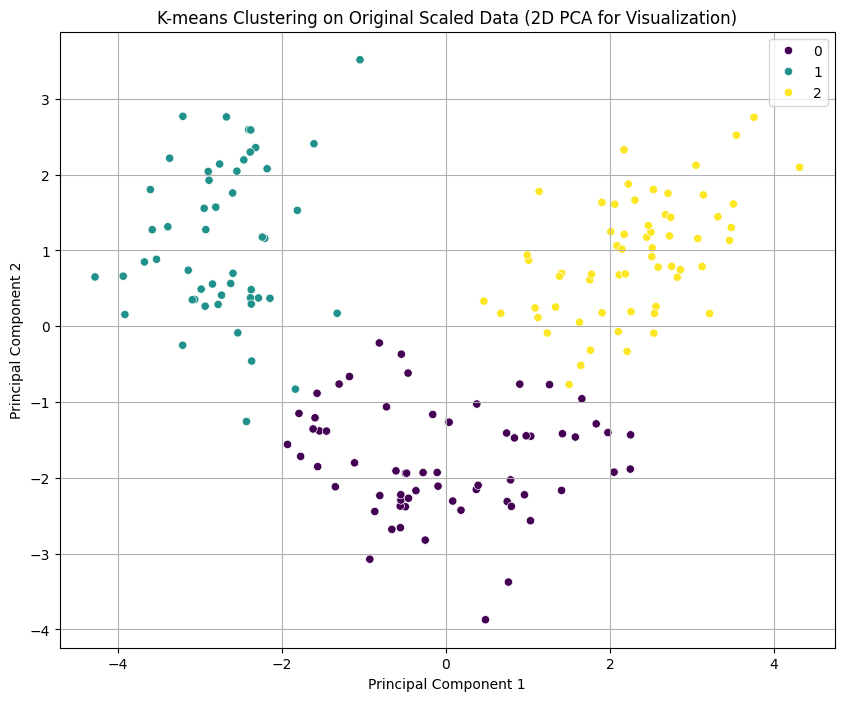

Clustering visualization for original data generated successfully.


In [37]:
print("Visualizing K-means clustering on original scaled data using 2D PCA...")

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


pca_2d_vis = PCA(n_components=2)


X_scaled_2d_vis = pca_2d_vis.fit_transform(X_scaled)


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_scaled_2d_vis[:, 0],
    y=X_scaled_2d_vis[:, 1],
    hue=clusters_original,
    palette='viridis',
    legend='full'
)

plt.title('K-means Clustering on Original Scaled Data (2D PCA for Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Clustering visualization for original data generated successfully.")

## Clustering with PCA Data

### Subtask:
Apply the same clustering algorithm to the PCA-transformed dataset, visualize the clustering results, and compare them with those from the original dataset.


**Reasoning**:
The first instruction is to determine the optimal number of clusters (K) for the PCA-transformed data (`X_pca`) using the Elbow Method. This requires calculating the Within-Cluster Sum of Squares (WCSS) for a range of K values and plotting them to identify the 'elbow' point.



Determining optimal number of clusters (K) for PCA-transformed data using Elbow Method...


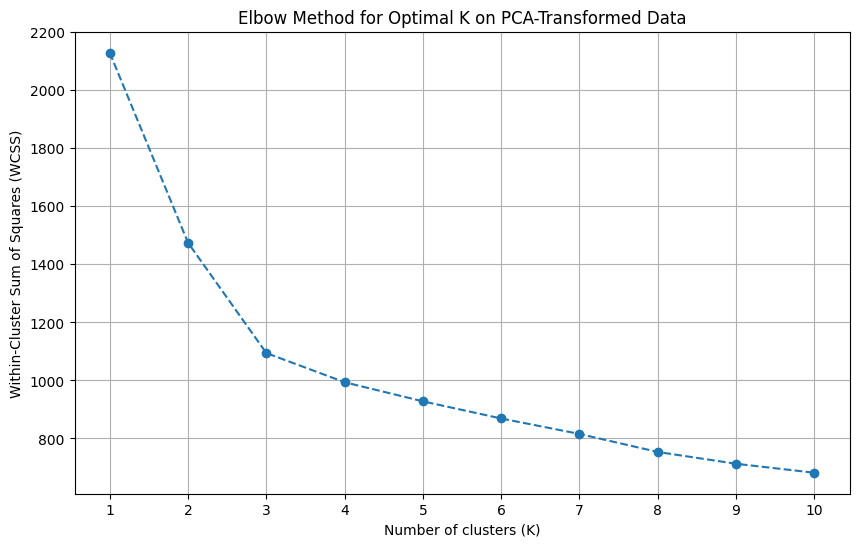

Elbow Method plot for PCA-transformed data generated successfully.


In [38]:
print("Determining optimal number of clusters (K) for PCA-transformed data using Elbow Method...")


wcss_pca = []


for k in range(1, 11):
    kmeans_pca_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)


    kmeans_pca_elbow.fit(X_pca)


    wcss_pca.append(kmeans_pca_elbow.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K on PCA-Transformed Data')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("Elbow Method plot for PCA-transformed data generated successfully.")

**Reasoning**:
Based on the elbow plot generated in the previous step, the optimal number of clusters appears to be 3. The next instruction is to apply K-means clustering to the `X_pca` data using this optimal number of clusters, fit the model, and store the resulting cluster labels.



In [39]:
print("Applying K-means clustering to PCA-transformed data...")


optimal_k_pca = 3


kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)


kmeans_pca.fit(X_pca)
clusters_pca = kmeans_pca.labels_

print(f"K-means clustering applied to PCA-transformed data with {optimal_k_pca} clusters.")
print("First 5 cluster labels for PCA data:", clusters_pca[:5])

Applying K-means clustering to PCA-transformed data...
K-means clustering applied to PCA-transformed data with 3 clusters.
First 5 cluster labels for PCA data: [2 2 2 2 2]


**Reasoning**:
The next instruction is to evaluate the clustering performance on the PCA-transformed data using the Silhouette Score. This involves importing `silhouette_score` from `sklearn.metrics`, calculating it with `X_pca` and the generated `clusters_pca`, and then printing the score.



In [40]:
print("Evaluating clustering performance on PCA-transformed data using Silhouette Score...")

from sklearn.metrics import silhouette_score


silhouette_avg_pca = silhouette_score(X_pca, clusters_pca)

print(f"Silhouette Score for PCA-transformed data: {silhouette_avg_pca:.4f}")

Evaluating clustering performance on PCA-transformed data using Silhouette Score...
Silhouette Score for PCA-transformed data: 0.3150


**Reasoning**:
The next instruction is to visualize the clustering results for `X_pca` using a 2D scatter plot. Since `X_pca` already represents dimensionality-reduced data, the first two principal components will be used for the x and y axes, and the points will be colored according to their assigned cluster labels from `clusters_pca`.



Visualizing K-means clustering on PCA-transformed data...


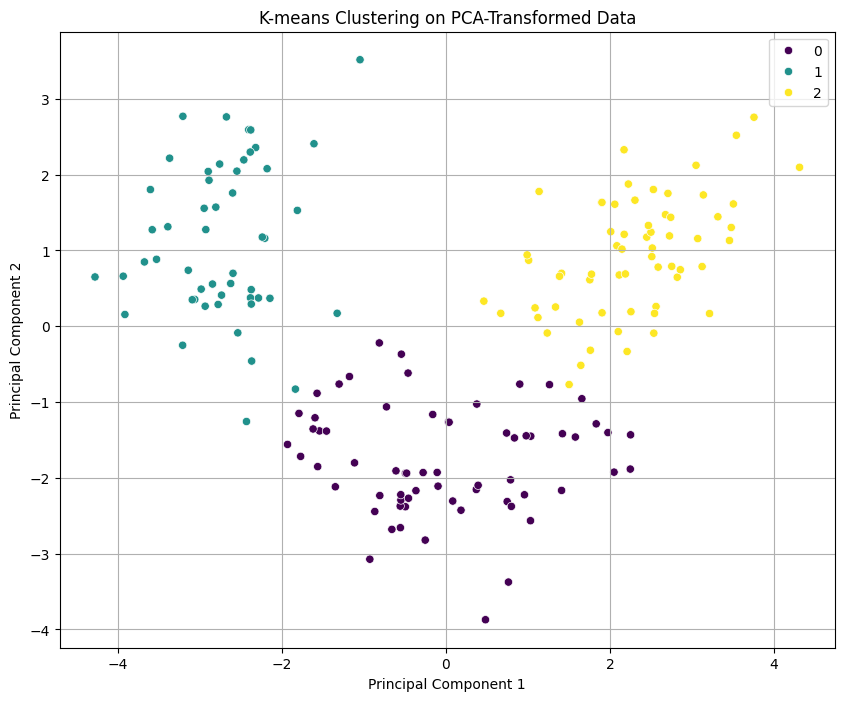

Clustering visualization for PCA-transformed data generated successfully.


In [41]:
print("Visualizing K-means clustering on PCA-transformed data...")

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters_pca,
    palette='viridis',
    legend='full'
)

plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Clustering visualization for PCA-transformed data generated successfully.")

## Comparison and Analysis


### Comparison of Silhouette Scores


*   **Silhouette Score for Original Scaled Data**: `0.2849`
*   **Silhouette Score for PCA-Transformed Data**: `0.3150`

**Observation**: The PCA-transformed data yielded a higher Silhouette Score (0.3150) compared to the original scaled data (0.2849).